**California housing price data exploration**

Explore median house values in Californian districts, given a number of features from these districts.

1. [Load `housing` data](#ds)
1. [Explore data](#ed)

In [1]:
#%run ../scripts/setup.ipynb

## 1. Load `housing` data <a class='anchor' id='ds'></a>

The goal is to explore median house values in Californian districts. The `California Hosuing Prices` dataset is based on data from 1990 California census. Dataset has been already downloaded and put in the `data` folder.

Let's take a peek at the top few rows of the `housing` dataset.

In [2]:
housing = pd.read_csv(f'{DATA_PATH}/housing.csv')
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

## 2. Explore `housing` data <a class='anchor' id='ed'></a>

Each row represents one district. There are 10 attributes. 

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are 20,640 entries in the dataset (quite small for a ML analysis). 
* `total_bedrooms` attribute has only 20,433 non null values. There are 207 missing values.
* All attributes are numerical with the exception of `ocean_proximity` that can be considered a categorical attribute.

Check what categories exist and how many districts belong to each category (use `value_counts()`).

In [4]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

`describe()` shows a summary of the numerical attributes. The null values are ignored.

In [5]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

The `std` row provides the standard deviation value or how dispersed the values are. The `percentile` (e.g. 25%, 50%-median, 75%) indicates the value below which a given percentage of observations in a group of observations fall.
* 25% of districts have a `housing_median_age` lower than 18
* 50% of districts have a `housing_median_age` lower than 29
* 75% of districts have a `housing_median_age` lower than 37

Saving figure attribute_histogram_plots


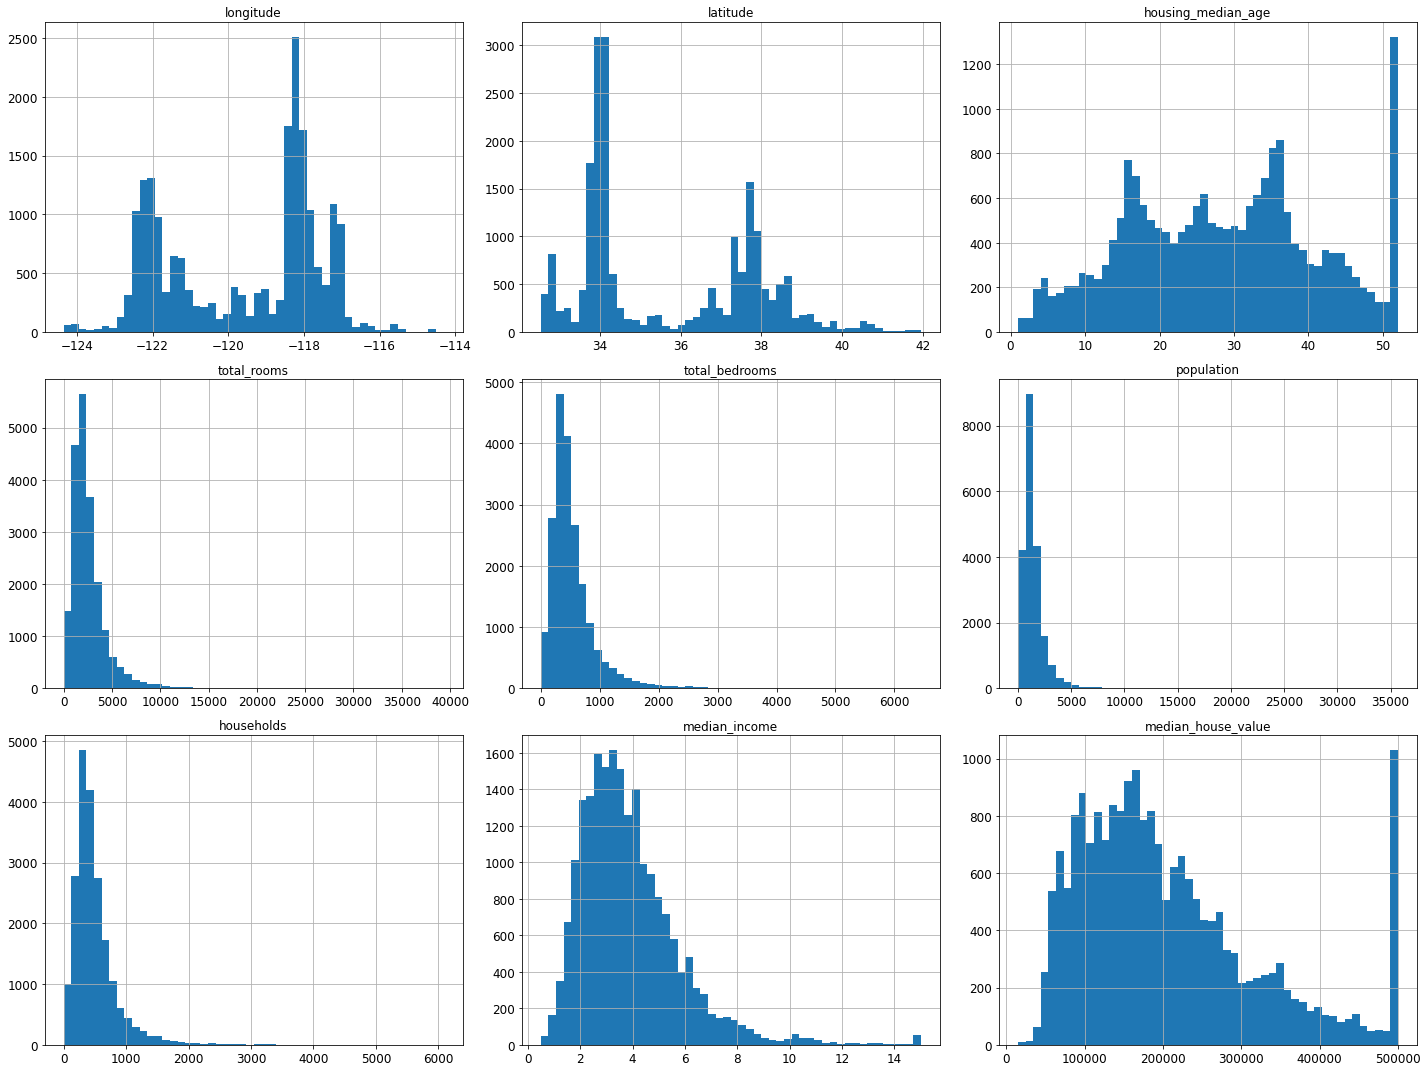

In [6]:
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

* The `median income` attribute does not look expressed in US dollar (they were already scaled and capped at 15) for higher `median incomes` and at 0.5 for lower `median incomes`.
* The `housing median age` and the `median house values` were also capped: the second one is the target attribute and a limit for the prices.
* The attributes have different scales.
* There are `tail-haivy` attributes: they extend to the right of the median than to the left.

To ensure that the set is representative of the various categories of incomes, it is useful to create `income_cat` attribute.
`median_income` values are mainly clustered around 1.5 to 6, and some of them are beyond 6.

<AxesSubplot:>

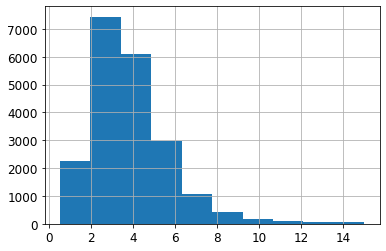

In [7]:
housing["median_income"].hist()

Use the `cut()` function to create `income_cat` with five categories labeled from 1 to 5.

In [8]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

  income_cat  
0          5  
1          5  
2          5  
3          4  
4          3

In [9]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

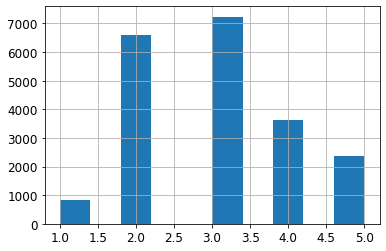

In [10]:
housing["income_cat"].hist()

### Visualizing Geographical Data

Consider lat and lon information to create a scatterplot of all districts to visualize data.

Saving figure bad_visualization_plot


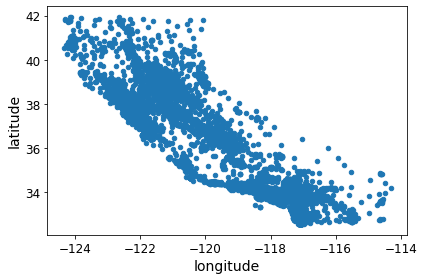

In [11]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

With the `alpha` parameter it is possible to visualize the places where there is a high density of data points.

Saving figure better_visualization_plot


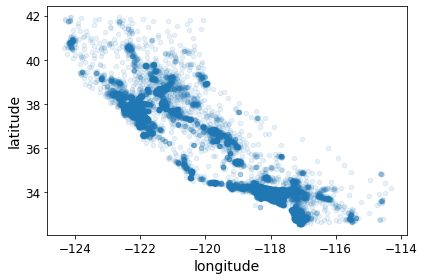

In [12]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

Saving figure housing_prices_scatterplot


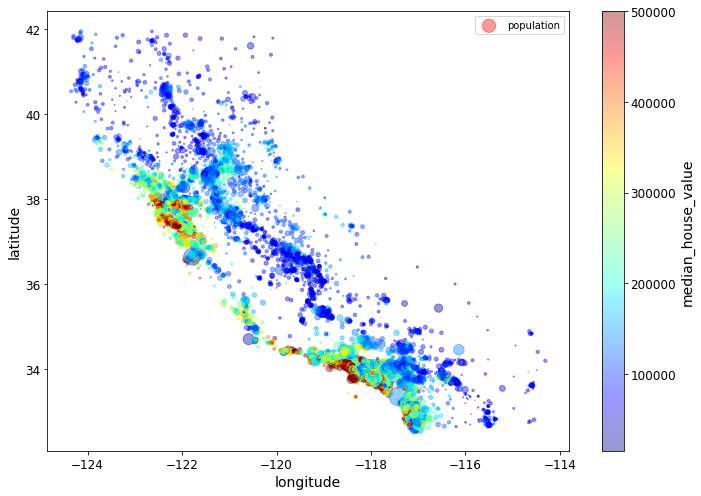

In [13]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

The radious of each circle represents the district's population (`s`), the color represents the price (`c`). `cmap` is the predefined color map (set to `jet`): blue means low prices, red means high prices. The housing prices are very much relatred to the location and the population density.

In [14]:
filename="california_1.png"

Saving figure california_housing_prices_plot


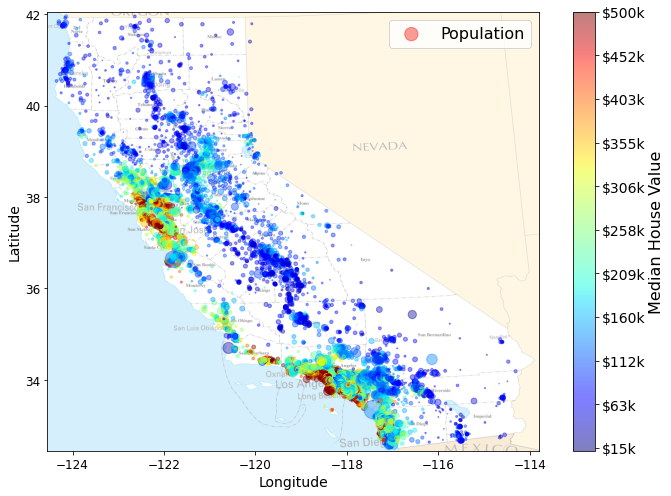

In [15]:
california_img = mpimg.imread(os.path.join(IMAGES_PATH, filename))
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

You can observe the Bay Area, around Los Angeles and San Diego, around Sacramento and Fresno.

### Looking for Correlations

In [16]:
corr_matrix = housing.corr()

Detect how each attribute correlates with the `median house value`. Use the `corr_matrix()` function.

In [17]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

The correlation coefficient shows someething 
* Close to 1 means that there is a strong positive correlation (`median_hous_value` up and `median_income` up)
* Close to -1 means that there is a strong negative correlation (`latitude` and `long`)
* Close to 0 means that there is no linear correlation

You can do the same with the `scatter_matrix()` function. Apply to a subset of attributes.

Saving figure scatter_matrix_plot


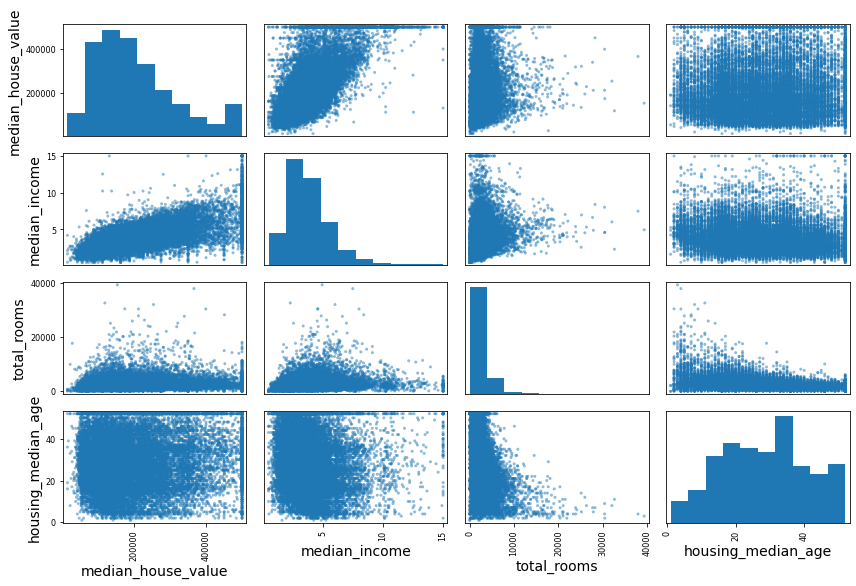

In [18]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

The most promising attribute to predict the `median house value` is the `median income`.

Saving figure income_vs_house_value_scatterplot


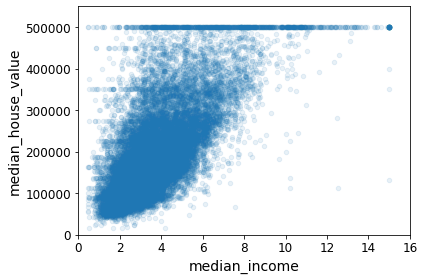

In [19]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

* The correlation is quite strong. There is an upward trend and the points are not dispersed particularly. 
* The price cap is visible at the horizontal line at 500,000 dollar.
* There is another cap at around 450,000 dollar.
* Another cap at 350,000 dollar.
* Maybe some other caps below.

### Combining attributes

* Determine `rooms per household`
* Determine `bedrooms per household`
* Determine `populations per household`

In [20]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [21]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

`bedrooms per room` is more correlated with the `median house value` with respect to the `total bedrooms`.

Houses with a lower bedrooms/rooms are more expensive.

Larger houses are more expensive.

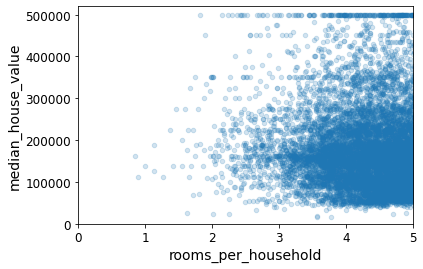

In [22]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [23]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  rooms_per_household  bedrooms_per_room  \
count        20640.000000         20640.000000       20433.000000   
mean        206855.816909             5.429000           0.213039   
std         115395.615874             2.474173           0.057983   
min          14999.000000             0.846154           0.100000   
25%         119600.000000             4.440716           0.175427   
50%         179700.000000             5.229129           0.203162   
75%         264725.000000             6.052381           0.239821   
max         500001.000000           141.909091           1.000000   

       population_per_household  
count              20640.000000  
mean                   3.070655  
std                   10.386050  
min                    0.692308  
25%                    2.429741  
50%                    2.818116  
75%                    3.282261  
max                 1243.333333

### Data Cleaning

ML algorithms do not work with missing values. The critical variable is `total_bedrooms`. It is possible to solve this problem in various ways:

1. removing na values `housing.dropna(subset=["total_bedrooms"])`
2. removing the variable `housing.drop("total_bedrooms", axis=1)`
3. replacing na with median values

````
median = housing["total_bedrooms"].median() 
housing["total_bedrooms"].fillna(median, inplace=True)
````

In the third case you need to save the median value to put in the test set when you evaluate the model.

Create a copy of the housing dataset, keeping only the rows that contain at least one null. 

In [24]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290    -122.16     37.77                47.0       1256.0             NaN   
341    -122.17     37.75                38.0        992.0             NaN   
538    -122.28     37.78                29.0       5154.0             NaN   
563    -122.24     37.75                45.0        891.0             NaN   
696    -122.10     37.69                41.0        746.0             NaN   

     population  households  median_income  median_house_value  \
290       570.0       218.0         4.3750            161900.0   
341       732.0       259.0         1.6196             85100.0   
538      3741.0      1273.0         2.5762            173400.0   
563       384.0       146.0         4.9489            247100.0   
696       387.0       161.0         3.9063            178400.0   

    ocean_proximity income_cat  rooms_per_household  bedrooms_per_room  \
290        NEAR BAY          3             5.761468                NaN   
341        NEAR BAY          2             3.830116                NaN   
538        NEAR BAY          2             4.048704                NaN   
563        NEAR BAY          4             6.102740                NaN   
696        NEAR BAY          3             4.633540                NaN   

     population_per_household  
290                  2.614679  
341                  2.826255  
538                  2.938727  
563                  2.630137  
696                  2.403727

In [25]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity, income_cat, rooms_per_household, bedrooms_per_room, population_per_household]
Index: []

In [26]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

longitude  latitude  housing_median_age  total_rooms  population  \
290    -122.16     37.77                47.0       1256.0       570.0   
341    -122.17     37.75                38.0        992.0       732.0   
538    -122.28     37.78                29.0       5154.0      3741.0   
563    -122.24     37.75                45.0        891.0       384.0   
696    -122.10     37.69                41.0        746.0       387.0   

     households  median_income  median_house_value ocean_proximity income_cat  \
290       218.0         4.3750            161900.0        NEAR BAY          3   
341       259.0         1.6196             85100.0        NEAR BAY          2   
538      1273.0         2.5762            173400.0        NEAR BAY          2   
563       146.0         4.9489            247100.0        NEAR BAY          4   
696       161.0         3.9063            178400.0        NEAR BAY          3   

     rooms_per_household  bedrooms_per_room  population_per_household  
290             5.761468                NaN                  2.614679  
341             3.830116                NaN                  2.826255  
538             4.048704                NaN                  2.938727  
563             6.102740                NaN                  2.630137  
696             4.633540                NaN                  2.403727

In [27]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3

In [28]:
sample_incomplete_rows

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290    -122.16     37.77                47.0       1256.0           435.0   
341    -122.17     37.75                38.0        992.0           435.0   
538    -122.28     37.78                29.0       5154.0           435.0   
563    -122.24     37.75                45.0        891.0           435.0   
696    -122.10     37.69                41.0        746.0           435.0   

     population  households  median_income  median_house_value  \
290       570.0       218.0         4.3750            161900.0   
341       732.0       259.0         1.6196             85100.0   
538      3741.0      1273.0         2.5762            173400.0   
563       384.0       146.0         4.9489            247100.0   
696       387.0       161.0         3.9063            178400.0   

    ocean_proximity income_cat  rooms_per_household  bedrooms_per_room  \
290        NEAR BAY          3             5.761468                NaN   
341        NEAR BAY          2             3.830116                NaN   
538        NEAR BAY          2             4.048704                NaN   
563        NEAR BAY          4             6.102740                NaN   
696        NEAR BAY          3             4.633540                NaN   

     population_per_household  
290                  2.614679  
341                  2.826255  
538                  2.938727  
563                  2.630137  
696                  2.403727

Use `SimpleImputer` to replace na values with the median values. 

In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

Remove the text attribute because median can only be calculated on numerical attributes:

In [30]:
housing_num = housing.drop("ocean_proximity", axis=1)
housing_num.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value income_cat  \
0       322.0       126.0         8.3252            452600.0          5   
1      2401.0      1138.0         8.3014            358500.0          5   
2       496.0       177.0         7.2574            352100.0          5   
3       558.0       219.0         5.6431            341300.0          4   
4       565.0       259.0         3.8462            342200.0          3   

   rooms_per_household  bedrooms_per_room  population_per_household  
0             6.984127           0.146591                  2.555556  
1             6.238137           0.155797                  2.109842  
2             8.288136           0.129516                  2.802260  
3             5.817352           0.184458                  2.547945  
4             6.281853           0.172096                  2.181467

`imputer` computes the median to the numerical attributes and stores results in `statistics_`.

In [31]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [32]:
imputer.statistics_

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  3.00000000e+00,  5.22912879e+00,  2.03162434e-01,
        2.81811565e+00])

Check that this is the same as manually computing the median of each attribute:

housing_num.median().values

Transform the training set by replacing the missing values with the median values of the learned medians.

In [33]:
X = imputer.transform(housing_num)

In [34]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [35]:
housing_tr.loc[sample_incomplete_rows.index.values]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290    -122.16     37.77                47.0       1256.0           435.0   
341    -122.17     37.75                38.0        992.0           435.0   
538    -122.28     37.78                29.0       5154.0           435.0   
563    -122.24     37.75                45.0        891.0           435.0   
696    -122.10     37.69                41.0        746.0           435.0   

     population  households  median_income  median_house_value  income_cat  \
290       570.0       218.0         4.3750            161900.0         3.0   
341       732.0       259.0         1.6196             85100.0         2.0   
538      3741.0      1273.0         2.5762            173400.0         2.0   
563       384.0       146.0         4.9489            247100.0         4.0   
696       387.0       161.0         3.9063            178400.0         3.0   

     rooms_per_household  bedrooms_per_room  population_per_household  
290             5.761468           0.203162                  2.614679  
341             3.830116           0.203162                  2.826255  
538             4.048704           0.203162                  2.938727  
563             6.102740           0.203162                  2.630137  
696             4.633540           0.203162                  2.403727

In [36]:
imputer.strategy

'median'

In [37]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [38]:
housing_tr.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  income_cat  \
0       322.0       126.0         8.3252            452600.0         5.0   
1      2401.0      1138.0         8.3014            358500.0         5.0   
2       496.0       177.0         7.2574            352100.0         5.0   
3       558.0       219.0         5.6431            341300.0         4.0   
4       565.0       259.0         3.8462            342200.0         3.0   

   rooms_per_household  bedrooms_per_room  population_per_household  
0             6.984127           0.146591                  2.555556  
1             6.238137           0.155797                  2.109842  
2             8.288136           0.129516                  2.802260  
3             5.817352           0.184458                  2.547945  
4             6.281853           0.172096                  2.181467

### Handling Text and Categorical Attributes

Now let's preprocess the categorical input feature, `ocean_proximity`.

In [39]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

ocean_proximity
0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
5        NEAR BAY
6        NEAR BAY
7        NEAR BAY
8        NEAR BAY
9        NEAR BAY

Convert these categories from text to numbers. Try `OrdinalEncoder`.

In [40]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

This `categories_` allows you to get the list of categories.

In [41]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Try `OneHotEncoder` to create a binary attribute per category. In One-hot encoding, only one attribute is equal to 1 (hot), 0 otherwise (cold)

In [42]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [43]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:

In [44]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [45]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]